**Regresion linea**

In [1]:
# Librerias
import matplotlib.pyplot as plt
import numpy as np


Generar vector

In [2]:
x = np.linspace(0, 10, 100)
# Dispersar los puntos
y = 7 + 2*x

Normalizar entre 0 y 1

In [3]:
epsilon = 1e-5  # Pequeño margen para evitar 0 y 1
ymin = np.min(y)
ymax = np.max(y)
y_norm = np.zeros(len(y))
for contador, elemento in enumerate(y):
    y_norm[contador] = (elemento - ymin) / (ymax - ymin) * (1 - 2 * epsilon) + epsilon


Dispersion de los valores normalizados.

In [4]:
y_norm_disp = y_norm + np.random.normal(0, 0.1, len(y_norm))

Mostrar grafica original contra normalizada

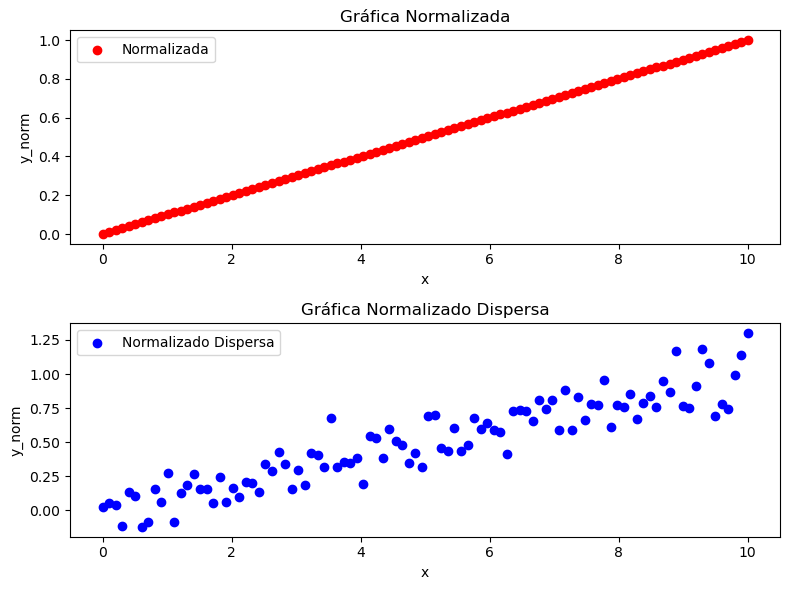

In [5]:
fig, ax = plt.subplots(2, 1, figsize=(8, 6))

# Gráfica original
ax[0].scatter(x, y_norm, label='Normalizada', color='red')
ax[0].set_title('Gráfica Normalizada')
ax[0].set_xlabel('x')
ax[0].set_ylabel('y_norm')
ax[0].legend()

# Gráfica normalizada
ax[1].scatter(x, y_norm_disp, label='Normalizado Dispersa', color='blue')
ax[1].set_title('Gráfica Normalizado Dispersa')
ax[1].set_xlabel('x')
ax[1].set_ylabel('y_norm')
ax[1].legend()

plt.tight_layout()
plt.show()

Aplicamos la regresion lineal

In [6]:
# Y = B0 + B1 * X + Epsilon
# Epsilon es el error aleatorio
# B0 es el intercepto
# B1 es la pendiente

x_mean = np.mean(x)
y_mean = np.mean(y_norm_disp)

B1 = np.sum((x-x_mean)*(y_norm_disp-y_mean))/np.sum((x-x_mean)**2)
B0 = y_mean - B1*x_mean
print(f'B0: {B0}')
print(f'B1: {B1}')

B0: -0.0076362971133620006
B1: 0.10154938345761903


Calculo RSS - Residual sum of squares

In [7]:
# RSS = Residual Sum of Squares
RSS = np.sum((y_norm_disp - (B0 + B1*x))**2)
print(f'RSS: {np.min(RSS)}')


RSS: 1.4794100818406133


Comparativa en la grafica

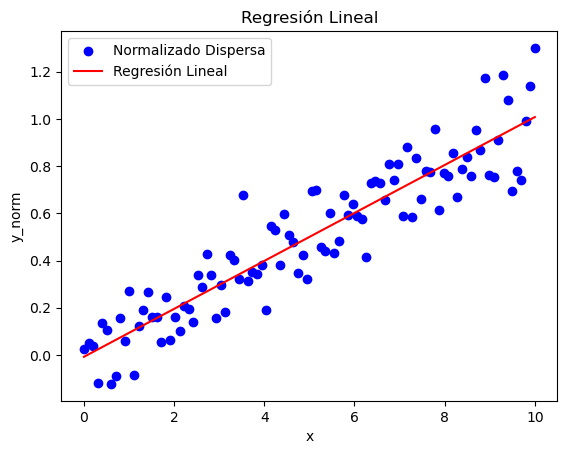

In [8]:
y_regresion = B0 + B1*x
#Grafica de la regresion
plt.scatter(x, y_norm_disp, label='Normalizado Dispersa', color='blue')
plt.plot(x, y_regresion, color='red', label='Regresión Lineal')
plt.title('Regresión Lineal')
plt.xlabel('x')
plt.ylabel('y_norm')
plt.legend()
plt.show()



Grafica RSS - B0 - B1 (Contornos)

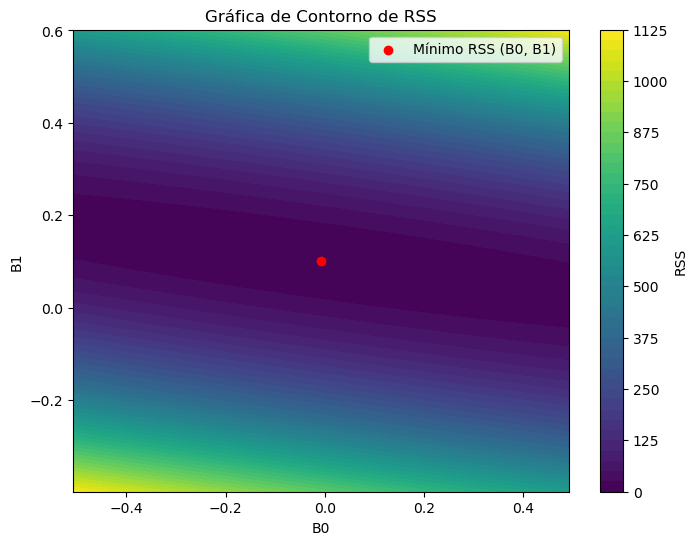

In [ ]:
from mpl_toolkits.mplot3d import Axes3D
# Crear un rango de valores para B0 y B1
B0_range = np.linspace(B0 - 0.5, B0 + 0.5, 100)
B1_range = np.linspace(B1 - 0.5, B1 + 0.5, 100)

# Crear una malla de valores para B0 y B1
B0_grid, B1_grid = np.meshgrid(B0_range, B1_range)

# Calcular RSS para cada combinación de B0 y B1
RSS_grid = np.zeros_like(B0_grid)
for i in range(B0_grid.shape[0]):
    for j in range(B0_grid.shape[1]):
        RSS_grid[i, j] = np.sum((y_norm_disp - (B0_grid[i, j] + B1_grid[i, j] * x))**2)

# Crear figura y ejes 3D
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Graficar la superficie 3D
surf = ax.plot_surface(B0_grid, B1_grid, RSS_grid, cmap='viridis', edgecolor='none')

# Agregar barra de color
fig.colorbar(surf, ax=ax, shrink=0.5, aspect=10, label='RSS')

# Etiquetas y título
ax.set_title('Superficie 3D de RSS')
ax.set_xlabel('B0')
ax.set_ylabel('B1')
ax.set_zlabel('RSS')

# Mostrar el punto mínimo
ax.scatter(B0, B1, RSS, color='red', label='Mínimo RSS (B0, B1)', s=50)
ax.legend()

plt.show()
